## Importing and cleaning of data

In [1]:
import pandas as pd
games = pd.read_csv(r'C:\Users\Ayush Rajpal\Downloads\appstore_games.csv')

In [2]:
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [3]:
games.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

In [4]:
games.drop(['URL', 'ID', 'Subtitle', 'Icon URL', 'Description', 'In-app Purchases', 'Developer', 'Languages', 'Genres', 'Original Release Date', 'Current Version Release Date'], axis = 1, inplace = True)
games.head()

,Name,Average User Rating,User Rating Count,Price,Age Rating,Size,Primary Genre
0,Sudoku,4.0,3553.0,2.99,4+,15853568.0,Games
1,Reversi,3.5,284.0,1.99,4+,12328960.0,Games
2,Morocco,3.0,8376.0,0.00,4+,674816.0,Games
3,Sudoku (Free),3.5,190394.0,0.00,4+,21552128.0,Games
4,Senet Deluxe,3.5,28.0,2.99,4+,34689024.0,Games


In [5]:
print(games.shape)
print(games.columns)

(17007, 7)
Index(['Name', 'Average User Rating', 'User Rating Count', 'Price',
       'Age Rating', 'Size', 'Primary Genre'],
      dtype='object')


In [6]:
# Dropping those rows which have null values in any one of these columns.
games = games.dropna(axis=0, subset=['Name', 'Average User Rating', 'Age Rating', 'Primary Genre'], how = 'any')

In [7]:
games.shape

(7561, 7)

In [8]:
# Counting null values in the following columns
# If there are any null values, will replace them by the mean of all the values of the particular column

print(games['User Rating Count'].isnull().sum())
print(games['Price'].isnull().sum())
print(games['Size'].isnull().sum())

0
0
0


In [9]:
# replace all spaces in the column names using with '_'
games.columns = games.columns.str.replace(' ', '_')
games.columns

Index(['Name', 'Average_User_Rating', 'User_Rating_Count', 'Price',
       'Age_Rating', 'Size', 'Primary_Genre'],
      dtype='object')

In [10]:
# To prevent biased user ratings, dropping the apps which have User_Rating_Count less than 10(taking less value considering data loss) 
games = games[games.User_Rating_Count >= 10]

In [11]:
# Resetting the index values after deletion of rows
games.reset_index(drop = True, inplace=True)

In [12]:
games.shape

(6156, 7)

In [13]:
games.head()

,Name,Average_User_Rating,User_Rating_Count,Price,Age_Rating,Size,Primary_Genre
0,Sudoku,4.0,3553.0,2.99,4+,15853568.0,Games
1,Reversi,3.5,284.0,1.99,4+,12328960.0,Games
2,Morocco,3.0,8376.0,0.00,4+,674816.0,Games
3,Sudoku (Free),3.5,190394.0,0.00,4+,21552128.0,Games
4,Senet Deluxe,3.5,28.0,2.99,4+,34689024.0,Games


## User Ratings with respect to Genres

In [43]:
unique_val = []
unique_val = games.Primary_Genre.unique()
print(unique_val)

['Games' 'Entertainment' 'Finance' 'Sports' 'Reference' 'Medical'
 'Utilities' 'Book' 'Education' 'Productivity' 'News' 'Business'
 'Social Networking' 'Health & Fitness' 'Lifestyle' 'Music' 'Stickers'
 'Shopping' 'Navigation']


In [22]:
countval = {}
countval = dict(games.Primary_Genre.value_counts())
print(countval)

{'Games': 5956, 'Entertainment': 69, 'Utilities': 37, 'Education': 35, 'Sports': 16, 'Reference': 11, 'Finance': 6, 'Productivity': 4, 'Health & Fitness': 3, 'Social Networking': 3, 'Music': 3, 'Book': 3, 'Lifestyle': 2, 'Stickers': 2, 'Medical': 2, 'News': 1, 'Business': 1, 'Navigation': 1, 'Shopping': 1}


In [36]:
# Improvement Done later - Another way of doing the task below

games.groupby('Primary_Genre').Average_User_Rating.mean()

Primary_Genre
Book                 4.166667
Business             4.000000
Education            4.228571
Entertainment        3.768116
Finance              4.333333
Games                4.106195
Health & Fitness     4.500000
Lifestyle            3.750000
Medical              3.000000
Music                4.500000
Navigation           4.000000
News                 4.500000
Productivity         4.125000
Reference            3.318182
Shopping             4.500000
Social Networking    3.833333
Sports               4.375000
Stickers             3.250000
Utilities            4.081081
Name: Average_User_Rating, dtype: float64

In [39]:
# Improvement Done later
# Converting the Series above into dictionary and rounding the values till 2 decimal places

user_ratings2 = dict(round(games.groupby('Primary_Genre').Average_User_Rating.mean(),2))
print(user_ratings2)

{'Book': 4.17, 'Business': 4.0, 'Education': 4.23, 'Entertainment': 3.77, 'Finance': 4.33, 'Games': 4.11, 'Health & Fitness': 4.5, 'Lifestyle': 3.75, 'Medical': 3.0, 'Music': 4.5, 'Navigation': 4.0, 'News': 4.5, 'Productivity': 4.12, 'Reference': 3.32, 'Shopping': 4.5, 'Social Networking': 3.83, 'Sports': 4.38, 'Stickers': 3.25, 'Utilities': 4.08}


In [23]:
x = games.shape[0]
totalratings = {}

for i in range(x):
    if games.Primary_Genre[i] in totalratings:
        totalratings[games.Primary_Genre[i]] += games.Average_User_Rating[i]
    else:
        totalratings[games.Primary_Genre[i]] = games.Average_User_Rating[i]
print(totalratings)

{'Games': 24456.5, 'Entertainment': 260.0, 'Finance': 26.0, 'Sports': 70.0, 'Reference': 36.5, 'Medical': 6.0, 'Utilities': 151.0, 'Book': 12.5, 'Education': 148.0, 'Productivity': 16.5, 'News': 4.5, 'Business': 4.0, 'Social Networking': 11.5, 'Health & Fitness': 13.5, 'Lifestyle': 7.5, 'Music': 13.5, 'Stickers': 6.5, 'Shopping': 4.5, 'Navigation': 4.0}


In [31]:
# Taking the mean and storing in the list 
user_rating = []
for i in uni:
    a = totalratings[i]/countval[i]
    user_rating.append(a)
print(user_rating)

[4.106195433176628, 3.7681159420289854, 4.333333333333333, 4.375, 3.3181818181818183, 3.0, 4.081081081081081, 4.166666666666667, 4.228571428571429, 4.125, 4.5, 4.0, 3.8333333333333335, 4.5, 3.75, 4.5, 3.25, 4.5, 4.0]


In [32]:
# Rounding off the values till 2 decimal places
user_ratings = []
for i in user_rating:
    user_ratings.append(round(i,2))
print(user_ratings)

[4.11, 3.77, 4.33, 4.38, 3.32, 3.0, 4.08, 4.17, 4.23, 4.12, 4.5, 4.0, 3.83, 4.5, 3.75, 4.5, 3.25, 4.5, 4.0]


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

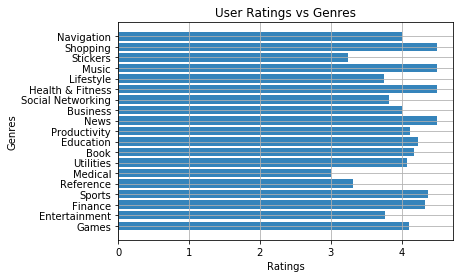

In [59]:
plt.barh(unique_val, user_ratings, alpha=0.90)
plt.xlabel("Ratings")
plt.ylabel("Genres")
plt.title('User Ratings vs Genres')
plt.grid()
plt.show()

## Trend of User Ratings with Price

In [60]:
games.head()

,Name,Average_User_Rating,User_Rating_Count,Price,Age_Rating,Size,Primary_Genre
0,Sudoku,4.0,3553.0,2.99,4+,15853568.0,Games
1,Reversi,3.5,284.0,1.99,4+,12328960.0,Games
2,Morocco,3.0,8376.0,0.00,4+,674816.0,Games
3,Sudoku (Free),3.5,190394.0,0.00,4+,21552128.0,Games
4,Senet Deluxe,3.5,28.0,2.99,4+,34689024.0,Games


In [65]:
games.Price.nunique()

18

In [63]:
games.groupby('Price').Average_User_Rating.mean()

Price
0.00      4.109959
0.99      3.951311
1.99      4.102484
2.99      4.058036
3.99      4.117021
4.99      4.100000
5.99      4.019231
6.99      4.187500
7.99      4.150000
8.99      4.166667
9.99      4.290698
11.99     4.166667
12.99     4.000000
14.99     3.750000
16.99     4.000000
19.99     4.100000
59.99     4.000000
139.99    4.500000
Name: Average_User_Rating, dtype: float64

In [67]:
price_dict = dict(games.groupby('Price').Average_User_Rating.mean())
print(price_dict)

{0.0: 4.109958912150264, 0.99: 3.951310861423221, 1.99: 4.10248447204969, 2.99: 4.058035714285714, 3.99: 4.117021276595745, 4.99: 4.1, 5.99: 4.019230769230769, 6.99: 4.1875, 7.99: 4.15, 8.99: 4.166666666666667, 9.99: 4.290697674418604, 11.99: 4.166666666666667, 12.99: 4.0, 14.99: 3.75, 16.99: 4.0, 19.99: 4.1, 59.99: 4.0, 139.99: 4.5}


In [69]:
# Splitting the dictionary into 2 different lists
price = list(price_dict.keys())
rating = list(price_dict.values())
print(price)
print(rating)

[0.0, 0.99, 1.99, 2.99, 3.99, 4.99, 5.99, 6.99, 7.99, 8.99, 9.99, 11.99, 12.99, 14.99, 16.99, 19.99, 59.99, 139.99]
[4.109958912150264, 3.951310861423221, 4.10248447204969, 4.058035714285714, 4.117021276595745, 4.1, 4.019230769230769, 4.1875, 4.15, 4.166666666666667, 4.290697674418604, 4.166666666666667, 4.0, 3.75, 4.0, 4.1, 4.0, 4.5]


In [71]:
# Sorting the data into different labels
Price = {}
Count = {}
for i in range(len(price)):
    if price[i] <= 3:
        if '0-3' in Price:
            Price['0-3'] += rating[i]
            Count['0-3'] += 1           
        else:
            Price['0-3'] = rating[i]
            Count['0-3'] = 1
            
    elif price[i] > 3 and price[i] <=6:
        if '3-6' in Price:
            Price ['3-6'] += rating[i]
            Count ['3-6'] += 1
        else:
            Price ['3-6'] = rating[i]
            Count ['3-6'] = 1
            
    elif price[i] > 6 and price[i] <=9:
        if '6-9' in Price:
            Price ['6-9'] += rating[i]
            Count ['6-9'] += 1
        else:
            Price ['6-9'] = rating[i]
            Count ['6-9'] = 1
            
    elif price[i] >9 and price[i] <=12:
        if '9-12' in Price:
            Price ['9-12'] += rating[i]
            Count ['9-12'] += 1
        else:
            Price ['9-12'] = rating[i]
            Count ['9-12'] = 1
            
    elif price[i] >12 and price[i] <=15:
        if '12-15' in Price:
            Price ['12-15'] += rating[i]
            Count ['12-15'] += 1
        else:
            Price ['12-15'] = rating[i]
            Count ['12-15'] = 1
            
    elif price[i] >15 and price[i] <=18:
        if '15-18' in Price:
            Price ['15-18'] += rating[i]
            Count ['15-18'] += 1
        else:
            Price ['15-18'] = rating[i]
            Count ['15-18'] = 1
            
    elif price[i] >18:
        if '>18' in Price:
            Price ['>18'] += rating[i]
            Count ['>18'] += 1
        else:
            Price ['>18'] = rating[i]
            Count ['>18'] = 1            
print(Price)
print(Count)

{'0-3': 16.22178995990889, '3-6': 12.236252045826514, '6-9': 12.504166666666666, '9-12': 8.45736434108527, '12-15': 7.75, '15-18': 4.0, '>18': 12.6}
{'0-3': 4, '3-6': 3, '6-9': 3, '9-12': 2, '12-15': 2, '15-18': 1, '>18': 3}


In [74]:
Range=['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '>18']
final_rating = []
for i in Range:
    final_rating.append(Price[i]/Count[i])
print(final_rating)

[4.055447489977222, 4.0787506819421715, 4.168055555555555, 4.228682170542635, 3.875, 4.0, 4.2]


In [75]:
final_ratings = []
for i in final_rating:
    final_ratings.append(round(i,2))
print(final_ratings)

[4.06, 4.08, 4.17, 4.23, 3.88, 4.0, 4.2]


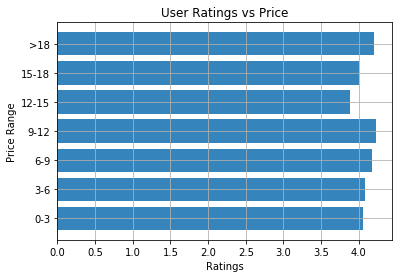

In [81]:
plt.barh(Range, final_ratings, alpha=0.90)
plt.xlabel("Ratings")
plt.ylabel("Price Range")
plt.title('User Ratings vs Price')
plt.grid()
plt.show()

## Inferences:

###  Genres like Shopping, Music, Health and Fitness and News apps have highest user ratings as there are most liked by consumers.
###  These genres also have lower competition as compared to others.
###  Stickers, Medical and Reference have got the least ratings thus developers should avoid these Genres.
###  Developer can price the app as per discretion, as most of them have ratings above 4.
###  Only the apps between the price range of 12 and 15 have average ratings less than 4.
###  At the last, developers should focus more on the Genres that have high average ratings as the cost is not a major issue. Consumers prefer the content more than price.